# Julia Prerequisites (v.1.4)

This notebook serves as a preamble to the other two notebooks found in this repository and by following it you will learn all the Julia language tools you will need in order to understand them. This notebook assumes prior exposure and some practical experience with programming languages used in numerical computing like Matlab, Python, Octave, Mathematica, or others.

# Operators and Variables

All the usual operators are defined in Julia similarly with other languages

In [7]:
println(1 + 1)
println(1 - 1)
println(2 * 5)
println(1 / 5)
println(2 ^ 3all the usual operators are defined in Julia similarly with other languages)

2
0
10
0.2
8


Variable assignment is also very similar

In [13]:
a = 2 # notive that in the Jupyter Notebook environment the last value that is returned is printed automatically

2

In [12]:
a = b = 2
a = 3
println("$a, $b")

3, 2


In [14]:
# if we want a value to not be returned we can use the semicolon (;)
c = 2;

# Functions

There are three ways to defined a function in Julia.  

In [17]:
# the quick way
f(x, y) = (x + y) ^ 2

f (generic function with 2 methods)

In [18]:
f(2,3)

25

In [19]:
# second way, use this if you have a lot of code inside a function
function g(x, y)
    (x + y) ^ 2 # last value is returned automatically
end

g (generic function with 1 method)

In [20]:
g(2, 3)

25

In [25]:
# the anonymous way, this is used inside other functions, 
# e.g. the filter function https://docs.julialang.org/en/v1/base/collections/#Base.filter
anonym_function = (x, y) -> (x + y) ^ 2

#9 (generic function with 1 method)

In [22]:
anonym_function(2, 3)

25

Note: An exclamation mark (!) at the end of a function's name indicates that the function operates __in-place__. This means that the arguments passed are altered directly instead of altering a copy and returning it.

## The Let syntax

The Let syntax allows creating a local environment in which all values are local. It is mostly used when running experiments with different paraments. By using it you can be sure that you are using the correct parameters.

In [63]:
let a = 1, b = 2, f = x->x^2 # these variables are only defined inside this block
    f(a + b) # we can do as many operations as we want here, all variables created will be local
end

9

In [65]:
f # f is not defined

UndefVarError: UndefVarError: f not defined

In [73]:
# let also let's (ha) us return value and assign it directly to a variable.
s = let (x1, x2) = [5, 7], (y1, y2) = [3, 2]
    distance = (x1 - x2)^2 + (y1 + y2)^2
    distance
end

29

In [71]:
s # is defined because it was created in global context

29

# Arrays and Matrices

Array, lists and matrices are structures that always confuse new comers to julia, so it is important to get the names clear from the start.  
Arrays can be n dimensional with 1d arrays being "lists" and 2d arrays being matrices.

In [3]:
# creating our first list
a = [1, 2, 3] # remember, last value is returned automatically, use semicolon if you don't want that

3-element Array{Int64,1}:
 1
 2
 3

In [4]:
# adding to an array
push!(a, 4)

4-element Array{Int64,1}:
 1
 2
 3
 4

In [7]:
# creating a 2d array
b = [1 2 3] # by putting a space instead of a comma in-between the numbers we can create a row of a 2d array

1×3 Array{Int64,2}:
 1  2  3

In [8]:
# 2 x 2 array
c = [1 2; 3 4] # by putting a semicolon in the brackets we can stack vertically 2 or more rows to create a multirow 2d array

2×2 Array{Int64,2}:
 1  2
 3  4

In [10]:
vcat(c, [5 6]) # append row to matrix via horizontal concatination

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [12]:
[c; 5 6] # append row to matrix using the semicolon syntax

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

## Indexing

In Julia indexes start from 1. Let's see some examples.

In [54]:
c = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [55]:
c[1,2] # first row, second column

2

In [62]:
c[:,1] # all rows, first column

2-element Array{Int64,1}:
 1
 3

# Broadcasting - Vectorized operations

In julia the dot (.) broadcasts a function to each element in a collection (any array like structure).

In [20]:
a = [1,2,3] # generates 3 random numbers from a uniform 0-1 distribution
b = [1,2,3]
c = a .* b

3-element Array{Int64,1}:
 1
 4
 9

In [21]:
# the above code is similar to the following loop
c = zeros(Int64, 3) # array of size 3 filled with 0s of type Int64
for i in eachindex(a) # or eachindex(b), eachindex returns a range from 1 to the length of the collection
    c[i] = a[i] * b[i]
end
c

3-element Array{Int64,1}:
 1
 4
 9

In [35]:
# broadcasting is also very usefull for broadcasting functions
a = b = zeros(10)
length.([a,b])

2-element Array{Int64,1}:
 10
 10

In [36]:
a = [1,2,3]
exp.(a)

3-element Array{Float64,1}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

In [39]:
a = [1,2,3]
2 .^ a

3-element Array{Int64,1}:
 2
 4
 8

## The broadcasting macro

The broadcasting macro @. broadcasts every function and operator to the right of it. It is used instead of multiple broadcast operators, it makes the code look cleaner and more understandable.

In [52]:
a = @. sin(2pi * (1:5))

5-element Array{Float64,1}:
 -2.4492935982947064e-16
 -4.898587196589413e-16
 -7.347880794884119e-16
 -9.797174393178826e-16
 -1.2246467991473533e-15

In [53]:
# the expression above is equivalent to the following loop
a = zeros(5)
for i in 1:5
    a[i] = sin(2pi * i)
end
a

5-element Array{Float64,1}:
 -2.4492935982947064e-16
 -4.898587196589413e-16
 -7.347880794884119e-16
 -9.797174393178826e-16
 -1.2246467991473533e-15

# The Pipe operator

The piper operator is incredibly useful in Julia, it allows us to apply a function to an output of a previous one with very little effort.

In [40]:
rand(10) |> sum

5.384548583018514

In [41]:
# the above cell is equivalent to 
sum(rand(10))

4.757780690987239

In [42]:
# not only that but the Pipe operator can be combined with the broadcasting operator
a = b = zeros(10)
[a,b] .|> length

2-element Array{Int64,1}:
 10
 10

# Ranges

In julia ranges are created with the colon (:) operator

In [24]:
1:5

1:5

In [25]:
# the collect function takes a range and returns the collected values
collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [26]:
# you can also add a step 
1:2:10 |> collect

5-element Array{Int64,1}:
 1
 3
 5
 7
 9

In [33]:
# for more complex ranges we make use of the range function
range(0, step = 0.25, length = 5)

0.0:0.25:1.0

In [34]:
range(0, step = 0.25, length = 5) |> collect

5-element Array{Float64,1}:
 0.0
 0.25
 0.5
 0.75
 1.0

# Plots and Packages

Julia has a very simple to use and efficient packaging system. To import a package into the workspace we use the keyword "using".

In [44]:
using LinearAlgebra

In [45]:
# to add a new package first import the Pkg package
using Pkg
# then we will make use of Pkg's functions to add the DataFrames package
Pkg.add("DataFrames")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [========================>                ]  59.0 %Fetching: [=====>                                   ]  10.3 %Fetching: [=====>                                   ]  10.9 %Fetching: [=====>                                   ]  11.4 %Fetching: [=====>                                   ]  11.9 %12.3 %Fetching: [======>                                  ]  12.9 %Fetching: [======>                                  ]  13.4 %Fetching: [======>                                  ]  13.9 %Fetching: [======>                                  ]  14.4 %Fetching: [======>                                  ]  14.7 %Fetching: [=======>                                 ]  15.2 %Fetching: [=======>                                 ]  15.5 %Fetching: [=======>                                 ]  16.1 %Fetching: [=======>                                 ]  16.6 %Fetching: [=======>                                 ]  17.2 %Fetching: [========>                                ]  17.8 %Fetching: [===

Fetching: [========================================>]  100.0 %Fetching: [========================>                ]  59.4 %Fetching: [========================>                ]  59.6 %Fetching: [========================>                ]  59.8 %Fetching: [========================>                ]  60.0 %Fetching: [=============================>           ]  70.5 %Fetching: [=============================>           ]  71.0 %Fetching: [=============================>           ]  71.3 %Fetching: [=============================>           ]  71.6 %Fetching: [=============================>           ]  72.0 %Fetching: [=============================>           ]  72.4 %Fetching: [==============================>          ]  72.8 %Fetching: [==============================>          ]  73.3 %Fetching: [==============================>          ]  73.8 %Fetching: [==============================>          ]  74.2 %Fetching: [==============================>          ]  74.4 %Fetching: [============

  Resolving package versions...
  Installed Zlib_jll ─────── v1.2.11+10
  Installed FFMPEG_jll ───── v4.1.0+3
  Installed LAME_jll ─────── v3.100.0+1
  Installed Parsers ──────── v1.0.0
  Installed Plots ────────── v0.29.9
  Installed StatsBase ────── v0.33.0
  Installed HTTP ─────────── v0.8.13
  Installed ColorTypes ───── v0.10.0
  Installed PlotThemes ───── v1.0.2
  Installed libass_jll ───── v0.14.0+2
  Installed libfdk_aac_jll ─ v0.1.6+2
  Installed x265_jll ─────── v3.0.0+1
  Installed x264_jll ─────── v2019.5.25+2
  Installed PlotUtils ────── v0.6.4
  Installed FriBidi_jll ──── v1.0.5+3
  Installed libvorbis_jll ── v1.3.6+4
  Installed Mustache ─────── v1.0.1
  Installed GR ───────────── v0.48.0
######################################################################### 100,0%#=#=-#  #                                                                      
######################################################################### 100,0%#=#=-#  #                                       

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


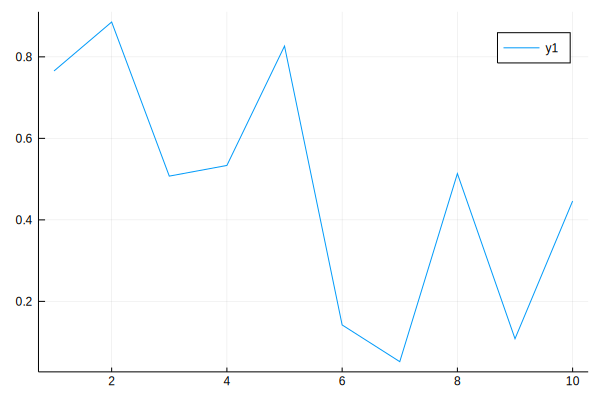

In [46]:
using Plots # import the plots package

a = rand(10)
plot(a) # plot a line of random numbers

More usage information on the plots package can be found on the plots documentation https://docs.juliaplots.org/